# Exploratory Data Analysis

__Before we proceed with building our model, we must fullt understand the nature of the data in order to produce the most efficient and well-performing models for the given data. We eill do this in our Exploratory Data Analysis.__

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the dataset
df = pd.read_csv('Data/bank_data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Seeing the shape of the data
df.shape

(39725, 21)

In [4]:
# Describing the data
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,39725.000000,39725.000000,39725.000000,39725.000000,39725.000000,39725.000000,39725.000000,39725.000000,39725.000000,39725.000000
mean,39.598691,258.314160,2.575481,0.210925,0.166772,0.109259,93.579461,-40.554585,3.651842,5168.627449
std,9.671795,259.706517,2.775323,1.326587,0.482504,1.554978,0.573590,4.570064,1.719139,70.975905
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,4918.000000,43.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Getting variable information about each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39725 entries, 0 to 39724
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39725 non-null  int64  
 1   job             39725 non-null  object 
 2   marital         39725 non-null  object 
 3   education       39725 non-null  object 
 4   default         39725 non-null  object 
 5   housing         39725 non-null  object 
 6   loan            39725 non-null  object 
 7   contact         39725 non-null  object 
 8   month           39725 non-null  object 
 9   day_of_week     39725 non-null  object 
 10  duration        39725 non-null  int64  
 11  campaign        39725 non-null  int64  
 12  pdays           39725 non-null  int64  
 13  previous        39725 non-null  int64  
 14  poutcome        39725 non-null  object 
 15  emp_var_rate    39725 non-null  float64
 16  cons_price_idx  39725 non-null  float64
 17  cons_conf_idx   39725 non-null 

In [6]:
# Checking duplicates
df.duplicated().sum()

0

__We see that we have some null values in our data. Also, we have 10 numeric features and 11 categorical features (including the target feature). Let us treat these null values first. Also, we have 12 duplicate rows in the data, which we will remove.__

In [7]:
# Getting number of null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

## Feature: AGE

__Variable stating the age of the customer.__

In [8]:
# Describing the age column in the dataframe
df.age.describe()

count    39725.000000
mean        39.598691
std          9.671795
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

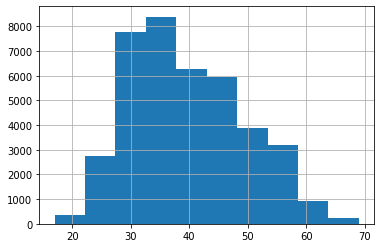

In [9]:
# Seeing the distribution of the age feature
df.age.hist()
plt.show()

__We see that the column is distributed pretty normally.__

## Feature: JOB

__Gives information regarding the customer's employment type.__

In [11]:
# Checking the distribution of the data
df.job.value_counts()

admin.           10502
blue-collar       9009
technician        6591
services          3866
management        2847
entrepreneur      1420
self-employed     1380
retired           1264
housemaid         1007
unemployed         987
student            852
Name: job, dtype: int64

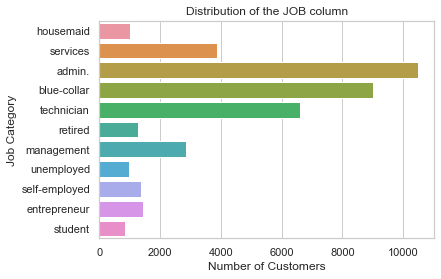

In [18]:
# Let us use the seaborn library to help visualize this
sns.set_theme(style='whitegrid')
g = sns.countplot(y='job', data=df).set_title('Distribution of the JOB column')
plt.xlabel('Number of Customers')
plt.ylabel('Job Category')
plt.show()